# Ứng Dụng Dự Đoán Mỡ Cơ Thể


## Data Set

Lists estimates of the percentage of body fat determined by underwater weighing and various body circumference measurements for 252 men.

The features contained in the dataset;

1. Density determined from underwater weighing
2. Percent body fat from Siri's (1956) equation
3. Age (years)
4. Weight (lbs)
5. Height (inches)
6. Neck circumference (cm)
7. Chest circumference (cm)
8. Abdomen 2 circumference (cm)
9. Hip circumference (cm)
10. Thigh circumference (cm)
11. Knee circumference (cm)
12. Ankle circumference (cm)
13. Biceps (extended) circumference (cm)
14. Forearm circumference (cm)
15. Wrist circumference (cm)


**Source**

The dataset is gotten from [kaggle](https://www.kaggle.com/datasets/fedesoriano/body-fat-prediction-dataset).

The data were generously supplied by Dr. A. Garth Fisher who gave permission to freely distribute the data and use for non-commercial purposes.

Roger W. Johnson
Department of Mathematics & Computer Science
South Dakota School of Mines & Technology
501 East St. Joseph Street
Rapid City, SD 57701

- email address: rwjohnso@silver.sdsmt.edu
- web address: http://silver.sdsmt.edu/~rwjohnso

In [ ]:
# Import những thư viện cần thiết
import pandas as pd  # type: ignore
import numpy as np  # type: ignore
import seaborn as sns   # type: ignore
import matplotlib.pyplot as plt # type: ignore
from scipy import stats # type: ignore
import warnings # type: ignore
from skimpy import skim # type: ignore

# Import modules để build model
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn import metrics 
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor # type: ignore
%matplotlib inline

# Tuỳ chỉnh 1 số setting cho phù hợp khi trực quan hoá và cảnh báo lỗi
pd.set_option('display.max_rows', 15)
sns.set() 
warnings.filterwarnings('ignore')

In [2]:
# Import dataset
df = pd.read_csv("bodyfat.csv")
df.head()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


In [3]:
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 252    │ │ float64     │ 14    │                                                          │
│ │ Number of columns │ 15     │ │ int32       │ 1     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name    ┃ NA  ┃ NA %   ┃ mean    ┃ sd        ┃ p0     ┃ p25    ┃ p50    ┃ p75    ┃ p100   ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━┩  │
│ │ Density        │   0 │      0 │   1.056 │   0.01903 │  0.995 │  1.041 │  1.055 │   1.07 │  1.109 │  ▃▇▇▅▁  │  │
│ │ BodyFat        │   0 │      0 │   19.15 │     8.369 │      0 │  12.47 │   19.2 │   25.3 │   47.5 │  ▂▆▇▅▁  │  │
│ │ Age            │   0 │      0 │   44.88 │      12.6 │     22 │  35.75 │     43 │     54 │     81 │ ▅▆▇▅▂▁  │  │
│ │ Weight         │   0 │      0 │   178.9 │     29.39 │  118.5 │    159 │  176.5 │    197 │  363.1 │   ▃▇▃   │  │
│ │ Height         │   0 │      0 │   70.15 │     3.663 │   29.5 │  68.25 │     70 │  72.25 │  77.75 │     ▆▇  │  │
│ │ Neck           │   0 │      0 │   37.99 │     2.431 │   31.1 │   36.4 │     38 │  39.42 │   51.2 │  ▁▇▇▂   │  │
│ │ Chest          │   0 │      0 │   100.8 │      8.43 │   79.3 │  94.35 │  99.65 │  105.4 │  136.2 │  ▁▆▇▂▁  │  │
│ │ Abdomen        │   0 │      0 │   92.56 │     10.78 │   69.4 │  84.57 │  90.95 │  99.33 │  148.1 │  ▃▇▅▁   │  │
│ │ Hip            │   0 │      0 │    99.9 │     7.164 │     85 │   95.5 │   99.3 │  103.5 │  147.7 │   ▃▇▂   │  │
│ │ Thigh          │   0 │      0 │   59.41 │      5.25 │   47.2 │     56 │     59 │  62.35 │   87.3 │  ▂▇▅▁   │  │
│ │ Knee           │   0 │      0 │   38.59 │     2.412 │     33 │  36.98 │   38.5 │  39.92 │   49.1 │  ▂▇▇▃   │  │
│ │ Ankle          │   0 │      0 │    23.1 │     1.695 │   19.1 │     22 │   22.8 │     24 │   33.9 │   ▁▇▃   │  │
│ │ Biceps         │   0 │      0 │   32.27 │     3.021 │   24.8 │   30.2 │  32.05 │  34.32 │     45 │  ▂▇▇▅   │  │
│ │ Forearm        │   0 │      0 │   28.66 │     2.021 │     21 │   27.3 │   28.7 │     30 │   34.9 │   ▆▇▃▁  │  │
│ │ Wrist          │   0 │      0 │   18.23 │    0.9336 │   15.8 │   17.6 │   18.3 │   18.8 │   21.4 │  ▁▅▇▆▁  │  │
│ └────────────────┴─────┴────────┴─────────┴───────────┴────────┴────────┴────────┴────────┴────────┴─────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

## Sơ Lược Về DataSet

In [231]:
df.shape

(252, 15)

In [232]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Density  252 non-null    float64
 1   BodyFat  252 non-null    float64
 2   Age      252 non-null    int64  
 3   Weight   252 non-null    float64
 4   Height   252 non-null    float64
 5   Neck     252 non-null    float64
 6   Chest    252 non-null    float64
 7   Abdomen  252 non-null    float64
 8   Hip      252 non-null    float64
 9   Thigh    252 non-null    float64
 10  Knee     252 non-null    float64
 11  Ankle    252 non-null    float64
 12  Biceps   252 non-null    float64
 13  Forearm  252 non-null    float64
 14  Wrist    252 non-null    float64
dtypes: float64(14), int64(1)
memory usage: 29.7 KB


### Kiểm Tra Các giá trị Oultier

In [240]:
upper_limit = []
lower_limit = []
for i in df.columns:
    upper_limit.append(df[i].mean() + (df[i].std())*4)
    lower_limit.append(df[i].mean() - (df[i].std())*4)

In [241]:
cols = list(df.columns)
j = 0
for i in range(len(cols)):
    
    temp = df.loc[(df[cols[i]]>upper_limit[j])&(df[cols[i]]<lower_limit[j])]
    j += 1

In [242]:
temp

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist


Như vậy thì dataset không có có giá trị Outlier

## Lựa Chọn Đặc Trưng 


### Sử dụng **ExtraTrees Regressor** để lựa chọn các đặc trưng trong các cột


In [245]:
# tạo bản copy
data = df.copy()

# tách cột đầu ra ( dự đoán) và đầu vào
y = data["BodyFat"]

X = data.drop(columns=["BodyFat"])

In [246]:
# import ExtraTrees Regressor
from sklearn.ensemble import ExtraTreesRegressor

# instantiate ExtrareeRegressor
er = ExtraTreesRegressor(random_state=21)

# Fit the Features and target labels
er.fit(X, y)

ExtraTreesRegressor(random_state=21)

In [247]:
# sắp xếp các đặc trưng từ cao đến thấp
series = pd.Series(er.feature_importances_, index=X.columns)
series.sort_values(ascending=False)

Density    0.729364
Abdomen    0.131089
Chest      0.069253
Hip        0.027568
Weight     0.015753
Knee       0.005386
Thigh      0.005246
Height     0.004435
Biceps     0.003959
Neck       0.002251
Age        0.002063
Wrist      0.001726
Ankle      0.001049
Forearm    0.000856
dtype: float64

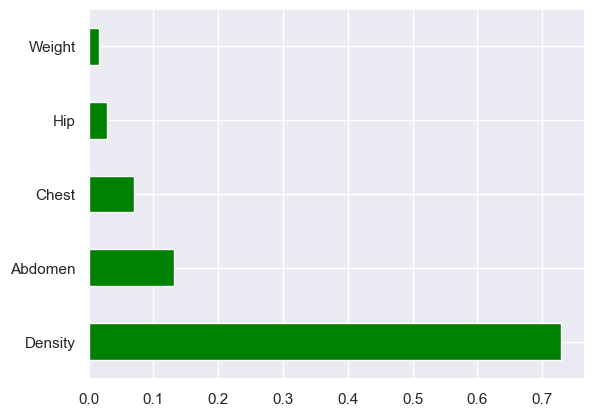

In [248]:
# visual qua plot
series.nlargest(5).plot(kind="barh", color="green");

### Removing Correlation

In [250]:
#
data 

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,1.0736,11.0,70,134.25,67.00,34.9,89.2,83.6,88.8,49.6,34.8,21.5,25.6,25.7,18.5
248,1.0236,33.6,72,201.00,69.75,40.9,108.5,105.0,104.5,59.6,40.8,23.2,35.2,28.6,20.1
249,1.0328,29.3,72,186.75,66.00,38.9,111.1,111.5,101.7,60.3,37.3,21.5,31.3,27.2,18.0
250,1.0399,26.0,72,190.75,70.50,38.9,108.3,101.3,97.8,56.0,41.6,22.7,30.5,29.4,19.8


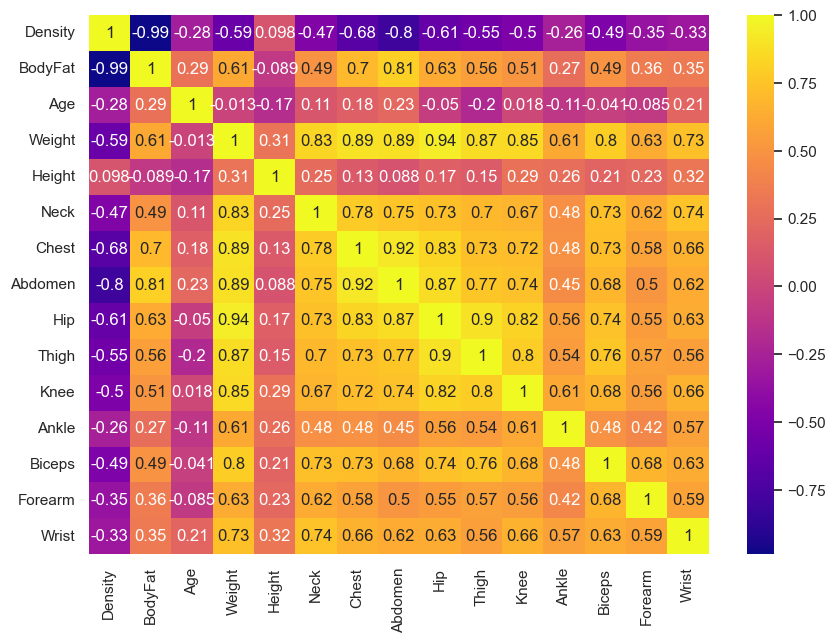

In [251]:
# visual qua plot corr
plt.figure(figsize=(10, 7))
sns.heatmap(data.corr(), annot=True, cmap="plasma");

In [ ]:
# chọn 1 mức threshhold để lọc các đặc trưng
def correlation(df, threshold):
    
    col_cor = set()
    
    cor_mat = df.corr()
    
    for i in range(len(cor_mat)):
        
         for j in range(i):
                
                
                if abs(cor_mat.iloc[i][j]) > threshold:
                    col_name = cor_mat.columns[i]
                    col_cor.add(col_name)
                    
    return col_cor

ans = correlation(X, threshold=0.85)  

ans

{'Abdomen', 'Chest', 'Hip', 'Knee', 'Thigh'}

In [254]:
X.corr()[['Abdomen', 'Chest', 'Hip', 'Knee', 'Thigh']]

,Abdomen,Chest,Hip,Knee,Thigh
Density,-0.798955,-0.682599,-0.609331,-0.495040,-0.553091
Age,0.230409,0.176450,-0.050332,0.017516,-0.200096
Weight,0.887995,0.894191,0.940884,0.853167,0.868694
Height,0.087813,0.134892,0.170394,0.286053,0.148436
Neck,0.754077,0.784835,0.734958,0.672405,0.695697
Chest,0.915828,1.000000,0.829420,0.719496,0.729859
Abdomen,1.000000,0.915828,0.874066,0.737179,0.766624
Hip,0.874066,0.829420,1.000000,0.823473,0.896410
Thigh,0.766624,0.729859,0.896410,0.799170,1.000000
Knee,0.737179,0.719496,0.823473,1.000000,0.799170


Qua việc kiểm tra, có thể thấy sơ bộ rằng các đặc trưng đc tính toán bằng ETR đều hoàn toàn chính xác, ta sẽ tiếp tục xét tiếp 1 vài đặc trưng qua các hàm đánh giá sau

In [256]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

**Ta sẽ tính phương sai của các đặc trưng**

In [258]:
# copy data
temp = data[list(data.columns)]
info = pd.DataFrame()

# tính điểm phương sai 
info["VIF"] = [variance_inflation_factor(temp.values, i) for i in range(temp.shape[1])] 
info["Columns"] = temp.columns
info

,VIF,Columns
0,3695.622377,Density
1,33.845429,BodyFat
2,31.376101,Age
3,1238.097164,Weight
4,613.410514,Height
5,1081.965633,Neck
6,1374.457425,Chest
7,1332.624257,Abdomen
8,2933.636131,Hip
9,1017.257501,Thigh


In [259]:
info.sort_values(by="VIF", ascending=False)

,VIF,Columns
0,3695.622377,Density
8,2933.636131,Hip
6,1374.457425,Chest
14,1349.973920,Wrist
7,1332.624257,Abdomen
3,1238.097164,Weight
10,1187.890413,Knee
5,1081.965633,Neck
9,1017.257501,Thigh
4,613.410514,Height


# Chọn Train_Data và Test_Data cho Model

In [262]:
col_1 = list(series.nlargest(5).index)

col_1

['Density', 'Abdomen', 'Chest', 'Hip', 'Weight']

In [264]:
data[['Density', 'Abdomen', 'Chest', 'Hip', 'Weight','BodyFat']]

,Density,Abdomen,Chest,Hip,Weight,BodyFat
0,1.0708,85.2,93.1,94.5,154.25,12.3
1,1.0853,83.0,93.6,98.7,173.25,6.1
2,1.0414,87.9,95.8,99.2,154.00,25.3
3,1.0751,86.4,101.8,101.2,184.75,10.4
4,1.0340,100.0,97.3,101.9,184.25,28.7
...,...,...,...,...,...,...
247,1.0736,83.6,89.2,88.8,134.25,11.0
248,1.0236,105.0,108.5,104.5,201.00,33.6
249,1.0328,111.5,111.1,101.7,186.75,29.3
250,1.0399,101.3,108.3,97.8,190.75,26.0


In [265]:
to_train = X[col_1]
to_train

,Density,Abdomen,Chest,Hip,Weight
0,1.0708,85.2,93.1,94.5,154.25
1,1.0853,83.0,93.6,98.7,173.25
2,1.0414,87.9,95.8,99.2,154.00
3,1.0751,86.4,101.8,101.2,184.75
4,1.0340,100.0,97.3,101.9,184.25
...,...,...,...,...,...
247,1.0736,83.6,89.2,88.8,134.25
248,1.0236,105.0,108.5,104.5,201.00
249,1.0328,111.5,111.1,101.7,186.75
250,1.0399,101.3,108.3,97.8,190.75


In [266]:
to_train.to_csv('trained_data.csv', index=False)

## Xây Dựng Mô Hình

In [268]:
# Import modules để build model
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn import metrics 
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor 

In [337]:
# chia data set thành 4 tập với tập test chiếm 20%
X_train, X_test, y_train, y_test = train_test_split(to_train, 
                                                    y, 
                                                    test_size=0.2,
                                                   random_state=42)

In [339]:
X_train.shape, X_test.shape

((201, 7), (51, 7))

In [341]:
# Xây Dựng decision tree 
reg = DecisionTreeRegressor(random_state=42)
reg.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

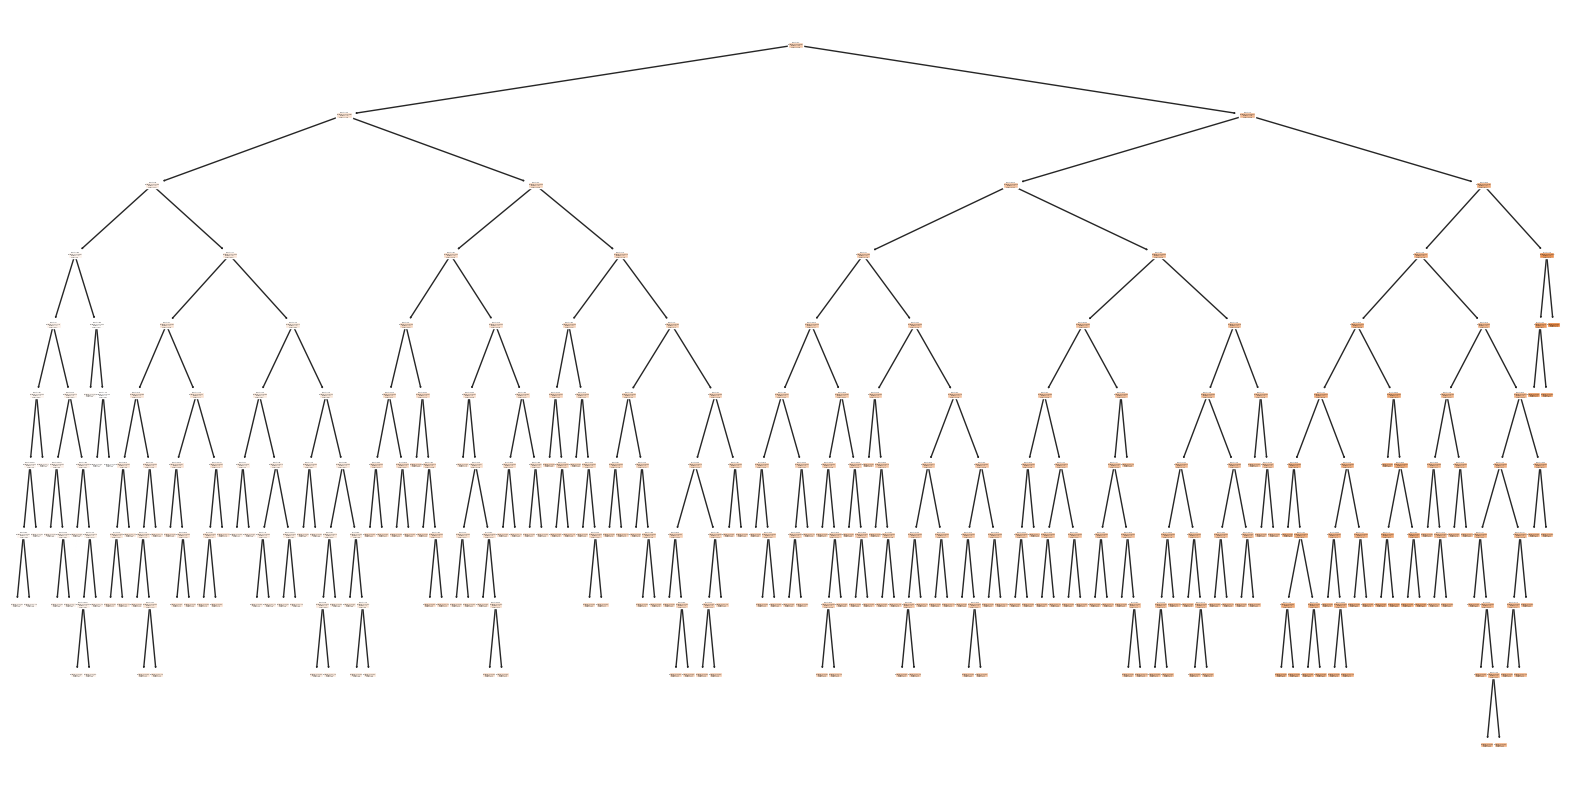

In [343]:
# Vẽ cây quyết định
plt.figure(figsize=(20, 10))  # Tăng kích thước figure
tree.plot_tree(reg, filled=True)  # Thêm tên đặc trưng và điều chỉnh font size

# Lưu ảnh với chất lượng cao
plt.savefig('decision_tree_full.png', dpi=300, bbox_inches='tight')  # Lưu ảnh với DPI cao
plt.show()  # Hiển thị ảnh (tùy chọn)

Ở đây ta sẽ tiến hành cắt tỉa cây để cải thiện hiệu suất

In [300]:
# prune the decision tree
path = reg.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas
ccp_alphas = ccp_alphas[:-1]

In [301]:
# train 1 tập models với nhiều mức ccp_alpha
alpha_list = []
for ccp_alpha in ccp_alphas:
    reg = DecisionTreeRegressor(random_state=0,ccp_alpha=ccp_alpha)
    reg.fit(X_train, y_train)
    alpha_list.append(reg)

In [302]:
# đánh giá điểm của train_data và test_data
train_score = [alpha_list[i].score(X_train, y_train) for i in range(len(alpha_list))]

test_score = [alpha_list[i].score(X_test, y_test) for i in range(len(alpha_list))]

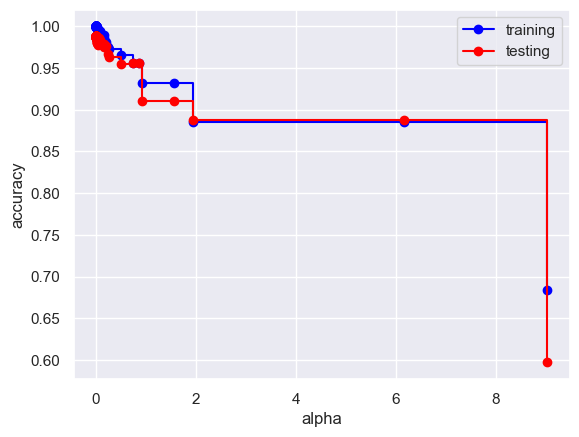

In [303]:
# Plot train and test
plt.xlabel("alpha")
plt.ylabel("accuracy")
plt.plot(ccp_alphas, train_score, marker="o", label="training", 
        color="blue", drawstyle="steps-post")
plt.plot(ccp_alphas, test_score, marker="o", label="testing", 
        color="red", drawstyle="steps-post");
plt.legend();

<Axes: xlabel='alpha'>

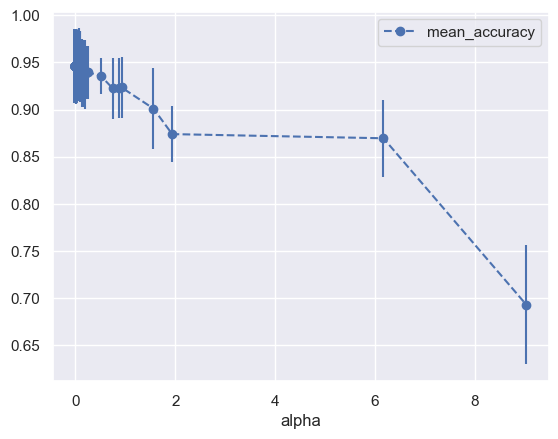

In [305]:
alpha_loop_values = []

# Tính giá trị dự đoán theo chuẩn và trung bình cho mỗi alpha
for ccp_alpha in ccp_alphas:
    reg_dt = DecisionTreeRegressor(random_state=0, ccp_alpha=ccp_alpha)
    scores = cross_val_score(reg_dt, X_train, y_train, cv=5)
    alpha_loop_values.append([ccp_alpha, np.mean(scores), np.std(scores)])


# Xuất kết quả
alpha_results = pd.DataFrame(alpha_loop_values,
                             columns=['alpha','mean_accuracy','std_accuracy'])

alpha_results.plot(x='alpha',
                   y='mean_accuracy',
                   yerr='std_accuracy',
                   marker = 'o',
                   linestyle = '--')

Ta thấy các mức giá trị tập trung chủ yếu ở mức 0-1 nên ta sẽ lấy ccp_alpha = 0.0001

In [306]:
idea_ccp_alpha = 0.0001

In [307]:
reg_dt_pruned = DecisionTreeRegressor(random_state=42, ccp_alpha=idea_ccp_alpha)

reg_dt_pruned = reg_dt_pruned.fit(X_train, y_train)

In [308]:
y_pred = reg_dt_pruned.predict(X_test)

print(f"Decision Tree after pruned: {metrics.r2_score(y_test, y_pred)} ")

Decision Tree after pruned: 0.959087447397312 


In [309]:
# Train lại model với ccp_alpha = 0.0001
to_train_list = np.array(to_train)

predicted = []
for i in range(len(to_train_list)):
    predicted.append(reg_dt_pruned.predict(to_train_list[i].reshape(1, -1)))

to_train["Actual"] = y 
to_train["Predicted Result"] = np.array(predicted)
to_train

,Density,Abdomen,Chest,Hip,Weight,Actual,Predicted Result
0,1.0708,85.2,93.1,94.5,154.25,12.3,12.250000
1,1.0853,83.0,93.6,98.7,173.25,6.1,6.050000
2,1.0414,87.9,95.8,99.2,154.00,25.3,25.260000
3,1.0751,86.4,101.8,101.2,184.75,10.4,10.350000
4,1.0340,100.0,97.3,101.9,184.25,28.7,28.700000
...,...,...,...,...,...,...,...
247,1.0736,83.6,89.2,88.8,134.25,11.0,10.950000
248,1.0236,105.0,108.5,104.5,201.00,33.6,33.600000
249,1.0328,111.5,111.1,101.7,186.75,29.3,29.350000
250,1.0399,101.3,108.3,97.8,190.75,26.0,26.033333


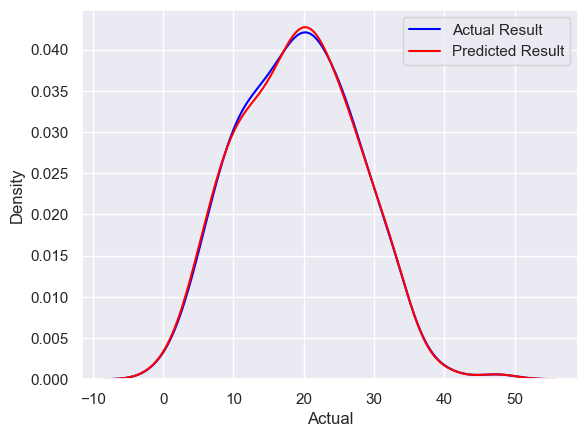

In [310]:
# biểu diễn kết quả thực tế ntn so với kết quả dự đoán
sns.kdeplot(to_train["Actual"], 
            label="Actual Result", 
            color="blue")
sns.kdeplot(to_train["Predicted Result"], 
            label="Predicted Result", 
            color="red")
plt.legend();

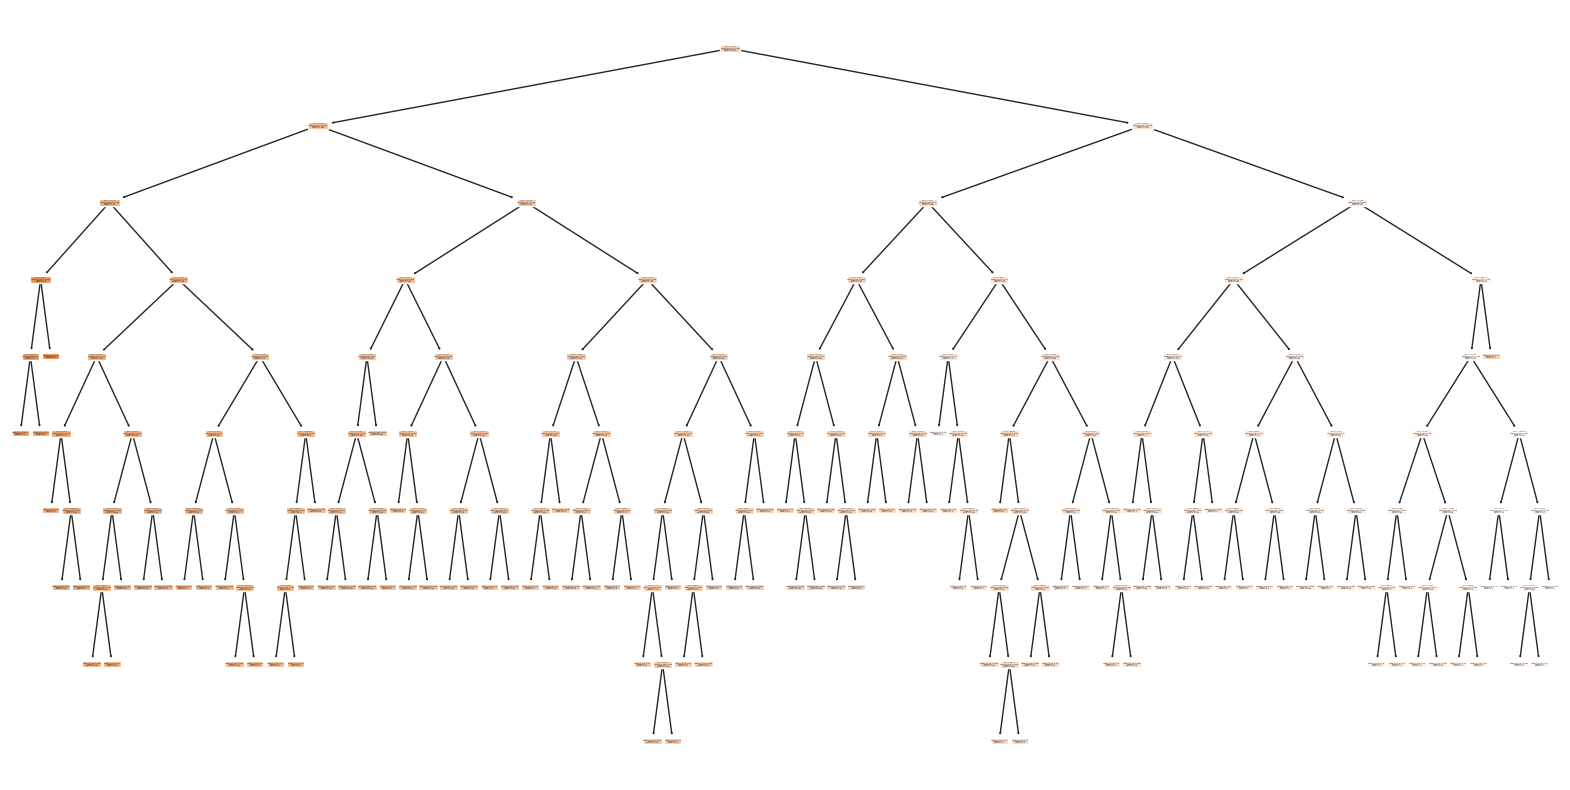

In [345]:
# Vẽ cây quyết định
plt.figure(figsize=(20, 10))  # Tăng kích thước figure
tree.plot_tree(reg_dt_pruned, filled=True)  # Thêm tên đặc trưng và điều chỉnh font size

# Lưu ảnh với chất lượng cao
plt.savefig('decision_tree_full_pruned.png', dpi=300, bbox_inches='tight')  # Lưu ảnh với DPI cao
plt.show()  # Hiển thị ảnh (tùy chọn)

In [329]:
y_pred = reg_dt_pruned.predict(X_test)

print(f"Decision Tree after pruned: {metrics.r2_score(y_test, y_pred)} ")

Decision Tree after pruned: 0.959087447397312 


In [313]:
# Lưu model
import pickle
file = open("body_fat_model_update.pkl", "wb")
pickle.dump(reg_dt_pruned, file)
file.close()